In [1]:
# this file collects all results for 8k, under 4 read out modes, up to cls=7 or 10.

In [2]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
#     explored_models_20200725_generator,
    explored_models_20201114_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [3]:
import pandas as pd

In [4]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
assert cc_max_all_neurons.shape == (79,)

In [5]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201114', 'main_result_sharebn.pkl')
makedirs(dirname(f_main_result), exist_ok=True)
# if not exists(f_main_result):
if True:
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
            'multi_path': True,
            'multi_path_separate_bn': False,
    },
        generator=chain(
            explored_models_20201114_generator(with_source=True, separate_bn_list=[False]),
            # more iterations cause OOM
    #             explored_models_20200801_generator(with_source=True),
    #             explored_models_20200725_generator(with_source=True),
        ),
        total_num_param=28,
        train_size_mapping={
            None: 5120,
        },
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=79,
        skip_eval_json=True,
        no_missing_data=False,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400


In [6]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           inst-avg     1280              0.353379   
                                                                                                  2560              0.543214   
                                                                                                  5120              0.570733   
                                                                                     inst-last    1280              0.314321   
                                                                                                  2560              0.526389   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560              0.318142   
                                                                                                  5120              0.287170   
                                                                                     inst-last    1280              0.258619   
                                                                                                  2560              0.331750   
                                                                                                  5120              0.315511   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           inst-avg     1280           0.170092   
                                                                                                  2560           0.253211   
                                                                                                  5120           0.263753   
                                                                                     inst-last    1280           0.149561   
                                                                                                  2560           0.244728   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560           0.147596   
                                                                                                  5120           0.132624   
                                                                                     inst-last    1280           0.120376   
                                                                                                  2560           0.154625   
                                                                                                  5120           0.146049   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           inst-avg     1280          0.377097   
                                                                                                  2560          0.480402   
                                                                                                  5120          0.494925   
                                                                                     inst-last    1280          0.352191   
                                                                           

In [7]:
# take main results and compare
f_ref_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_ref = pd.read_pickle(f_ref_result)

In [8]:
aaaa = df_main_result_ref.join(df_main_result.dropna(), how='inner', lsuffix='_ref', rsuffix='_new')

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

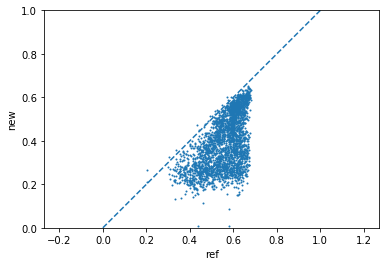

In [10]:
fig, ax = plt.subplots(squeeze=True);
scatter(ax, aaaa['cc2_normed_avg_ref'].values, aaaa['cc2_normed_avg_new'].values, 'ref', 'new')
plt.show()

In [11]:
from scipy.stats import pearsonr

In [12]:
pearsonr(aaaa['cc2_normed_avg_ref'].values, aaaa['cc2_normed_avg_new'].values)

(0.5488060251810931, 1.3717776258987282e-209)